# Genetic Algorithm(GA)  - Code with Python from Scratch
### Genetic Algorithm is sub-class of Evolutionary Algorithm(EA), i.e., it is random-based EA & a optimisation technique to find the "best" hyperparameter.

Based on Charles Darwin theoy of evolution where "Survival of Fittest", GA strives to find the Chromosome(Solution) that made up of string of Genes(Parameters) with the highest Fitness Value or the Fittest. This can be done by initializing an initial population and let them "breed" generations of offsprings until the best individual(chromosome) is achieved.

Before moving on to libraries like PyGAD, in this notebook, I will code from scratch to enhance my understanding.

References:
* Concept/Genetic Algorithm explained: https://www.linkedin.com/pulse/introduction-optimization-genetic-algorithm-ahmed-gad/    

* Put into Practice: https://www.linkedin.com/pulse/genetic-algorithm-implementation-python-ahmed-gad/

Both articles I read were authored by the author of PyGAD. Thanks a lot!!

## Goal
Given the equation
`Y = w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + w6x6` , I will use GA to find the "best" weights(represented by w1-w6) with given inputs(x1-x6)

### Package Needed

In [20]:
import numpy as np
import matplotlib.pyplot as plt

large_width = 400
np.set_printoptions(linewidth=large_width)

In [2]:
eqn_inputs = [-4,-2,3.5,5,-11,-4.7]
n_weights = 6 # w1,...w6

# solutions(chrommosomes) per population (Genotype)
# each solution/chromosome will have 6 values(allele) & locus(location), which is the weights
# to be determined based on problems/emprically
sol_per_population = 8

pop_size = (sol_per_population, n_weights) # population size



#### Define population with an initial population

In [3]:
# Define population. 
# Initially:
np.random.seed(42)
new_population = np.random.uniform(
    low = -4.0,
    high = 4.0,
    size = pop_size)

# Initial Population:
print(new_population)
print(np.shape(new_population))
print(type(new_population))

print(np.min(new_population))
print(np.max(new_population))

[[-1.00367905  3.60571445  1.85595153  0.78926787 -2.75185088 -2.75204384]
 [-3.5353311   2.92940917  0.80892009  1.66458062 -3.83532405  3.75927882]
 [ 2.65954113 -2.30128711 -2.54540026 -2.53276392 -1.56606206  0.19805145]
 [-0.54443985 -1.67016688  0.89482316 -2.88404911 -1.66284281 -1.06910525]
 [-0.35144013  2.28140769 -2.40260974  0.11387551  0.73931655 -3.6283967 ]
 [ 0.86035882 -2.63580701 -3.47958726  3.5910843   3.72505626  2.46717878]
 [-1.56308985 -3.21862309  1.47386421 -0.47878005 -3.02369412 -0.03858472]
 [-3.72489183  3.27456322 -1.92976015  1.30017827 -1.50631139  0.16054417]]
(8, 6)
<class 'numpy.ndarray'>
-3.8353240456335804
3.7592788172959546


In [4]:
n_gens = 5 # Number of generations/iterations, can use fixed value or set it high and define callback function
n_parents_mating = 4 # 4 solutions/chromosomes/parents present in Mating Pool to be mated

#### Fitness Function
Use to calculate Fitness Value of each solution/chromosome. With Fitness Value, we can determine which solution is the best(of that generation) and used to be mated. Since, intuitively: `Good Parents/Solution/Chromosome --produce--> Good Offspring/Children` .

Ideally, higher ther Fitness Value, the better.

In [5]:
def cal_pop_fitness(equation_inputs, pop):
     # Calculating the fitness value of each solution in the current population.
     # The fitness function calculates the sum of products between each input and its corresponding weight.
    # Pop = Population/Generation with nth number of solutions/chromosome. 
    # Hence its a tuple/array of (sol_per_population, n_weights)
    
    fitness_val = np.sum(pop * equation_inputs, axis=1)
    return fitness_val

In [6]:
cal_pop_fitness(eqn_inputs, new_population)

array([ 50.45042271,  43.95658358, -11.31247001,  17.54579426,  -2.07582902, -44.96431435,  48.89621357,  23.91203946])

#### Mating Pool
Where "Selection" process occurs to select the best parents of current generation to be mated and produce desirable offspring in the next gen.

In [7]:
new_population

# Do random new population again after executing the GA, 
# else the new population will the same, i.e. the best solution.

array([[-1.00367905,  3.60571445,  1.85595153,  0.78926787, -2.75185088, -2.75204384],
       [-3.5353311 ,  2.92940917,  0.80892009,  1.66458062, -3.83532405,  3.75927882],
       [ 2.65954113, -2.30128711, -2.54540026, -2.53276392, -1.56606206,  0.19805145],
       [-0.54443985, -1.67016688,  0.89482316, -2.88404911, -1.66284281, -1.06910525],
       [-0.35144013,  2.28140769, -2.40260974,  0.11387551,  0.73931655, -3.6283967 ],
       [ 0.86035882, -2.63580701, -3.47958726,  3.5910843 ,  3.72505626,  2.46717878],
       [-1.56308985, -3.21862309,  1.47386421, -0.47878005, -3.02369412, -0.03858472],
       [-3.72489183,  3.27456322, -1.92976015,  1.30017827, -1.50631139,  0.16054417]])

In [8]:
def select_mating_pool(pop, fitness, n_parents):
    parents = np.empty((n_parents, pop.shape[1]))
    
    # Choosing top (n_parents)th from the population.
    # Say n_parents = 4, it will choose the top 4 with highest Fitness Value in the Population
    max_fitness_idx_list = []
    for parent_num in range(n_parents):
        
        max_fitness_idx = np.where(fitness == np.max(fitness))
        max_fitness_idx = max_fitness_idx[0][0]
        max_fitness_idx_list.append(max_fitness_idx)
    
        parents[parent_num, :] = pop[max_fitness_idx, :]
        
        fitness[max_fitness_idx] = -99999999999 
        # Selected parent/Solution will be set to super low value to avoid choosing it again
    print("\nFittest Chromosome/Individual/Solution's Index : {x}".format(x = max_fitness_idx_list))
    return parents

### Variation Operators
Crossover --> Mutation

#### Crossover
To make it simple, we use "Single Point Crossover", where a point is set(in this case set it as mid-point of the chromosome) and crossover of Genes/Parameters between 2 parents happened with that point as reference.

In [9]:
def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)
    crossover_point = np.uint8(offspring_size[1]/2)
    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k%parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1)%parents.shape[0]
        
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
        
    return offspring

#### Mutation
After Crossover of parents, we need to mutate the chromosomes/solutions. For each offspring, select some genes and change its value. Without mutation the offspring will have all of its properties from its parents. To add new features to such offspring, mutation took place. But because mutation occurs randomly, it is not recommended to increase the number of genes to be applied to mutation.

The individual after mutation is called mutant.

To make it better, later on I will use PyGAD that allow users to define the mutation probability based on the the quality of the chromosome. In other words, if the fitness value of the solution > average fitness value of the population, it is considered as high quality and has lower mutation probabilty.

In [10]:
def mutation(offspring_crossover):
    # Mutation changes a single gene in each offspring randomly.
    for idx in range(offspring_crossover.shape[0]):
        # The random value to be added to the gene.
        random_value = np.random.uniform(-1.0, 1.0, 1)
        offspring_crossover[idx, 4] = offspring_crossover[idx, 4] + random_value
    return offspring_crossover

In [11]:
for generation in range(n_gens):
    print("\nGeneration: {x}\n".format(x =generation))
    
    # Measuring the fitness of each chromosome in the population.
    fitness = cal_pop_fitness(eqn_inputs, new_population)
    print("Fitness Value :")
    print(np.shape(fitness))
    print(fitness)
    
    # Selecting the best parents in the population for mating.
    parents = select_mating_pool(new_population, 
                                    fitness, 
                                    n_parents_mating
                                   )
    print("\nParents: ")
    print(parents)
    
    # Generating next generation using crossover.
    offspring_crossover = crossover(parents,
                                    offspring_size=(pop_size[0]-parents.shape[0], n_weights)
                                    )
    print("\nAfter Crossover :")
    print(offspring_crossover)
    
    # Adding some variations to the offsrping using mutation.
    offspring_mutation = mutation(offspring_crossover)
    print("\n After Mutation :")
    print(offspring_mutation)
    
    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation
    
    print("\nBest result : ", np.max(np.sum(new_population*eqn_inputs, axis=1)))
    



Generation: 0

Fitness Value :
(8,)
[ 50.45042271  43.95658358 -11.31247001  17.54579426  -2.07582902 -44.96431435  48.89621357  23.91203946]

Fittest Chromosome/Individual/Solution's Index : [0, 6, 1, 7]

Parents: 
[[-1.00367905  3.60571445  1.85595153  0.78926787 -2.75185088 -2.75204384]
 [-1.56308985 -3.21862309  1.47386421 -0.47878005 -3.02369412 -0.03858472]
 [-3.5353311   2.92940917  0.80892009  1.66458062 -3.83532405  3.75927882]
 [-3.72489183  3.27456322 -1.92976015  1.30017827 -1.50631139  0.16054417]]

After Crossover :
[[-1.00367905  3.60571445  1.85595153 -0.47878005 -3.02369412 -0.03858472]
 [-1.56308985 -3.21862309  1.47386421  1.66458062 -3.83532405  3.75927882]
 [-3.5353311   2.92940917  0.80892009  1.30017827 -1.50631139  0.16054417]
 [-3.72489183  3.27456322 -1.92976015  0.78926787 -2.75185088 -2.75204384]]

 After Mutation :
[[-1.00367905  3.60571445  1.85595153 -0.47878005 -2.93027356 -0.03858472]
 [-1.56308985 -3.21862309  1.47386421  1.66458062 -4.46561513  3.759

In [12]:
final_gen_pop = new_population

In [13]:
# Getting the best solution after iterating finishing all generations.
# At first, the fitness is calculated for each solution in the final generation.
fitness = cal_pop_fitness(eqn_inputs, final_gen_pop)

# Then return the index of that solution corresponding to the best fitness.
best_match_idx = np.where(fitness == np.max(fitness))

print("\nBest solution : ", new_population[best_match_idx, :])
print("\nBest solution fitness : ", fitness[best_match_idx])


Best solution :  [[[-1.56308985 -3.21862309  1.47386421  0.78926787 -3.79801613 -2.75204384]]]

Best solution fitness :  [76.50725316]


### Some findings

By having more iterations or letting the population to breed for more generations might yield a better results, as more generations(to certain point) better chromosomes can be discovered until the parameters determined yield no difference between the input and desired output. In this example, only 4 generations are iterated and it is not enough for it to converge.

### Trying with more Generations:

By setting a fixed random seed, we can have constant randomized arrays. For comparison purposes, I will try with 15 Generations instead of 4.

In [14]:
np.random.seed(42)
new_population = np.random.uniform(
    low = -4.0,
    high = 4.0,
    size = pop_size)

In [15]:
n_gens_2 = 15

In [16]:
best_result_array = []

for generation in range(n_gens_2):
    print("\nGeneration: {x}\n".format(x =generation))
    
    # Measuring the fitness of each chromosome in the population.
    fitness = cal_pop_fitness(eqn_inputs, new_population)
    print("Fitness Value :")
    print(np.shape(fitness))
    print(fitness)
    
    # Selecting the best parents in the population for mating.
    parents = select_mating_pool(new_population, 
                                    fitness, 
                                    n_parents_mating
                                   )
    print("\nParents: ")
    print(parents)
    
    # Generating next generation using crossover.
    offspring_crossover = crossover(parents,
                                    offspring_size=(pop_size[0]-parents.shape[0], n_weights)
                                    )
    print("\nAfter Crossover :")
    print(offspring_crossover)
    
    # Adding some variations to the offsrping using mutation.
    offspring_mutation = mutation(offspring_crossover)
    print("\n After Mutation :")
    print(offspring_mutation)
    
    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation
    
    best_result_of_gen = np.max(np.sum(new_population*eqn_inputs, axis=1))
    print("\nBest result : ", best_result_of_gen)
    best_result_array.append(best_result_of_gen)
    



Generation: 0

Fitness Value :
(8,)
[ 50.45042271  43.95658358 -11.31247001  17.54579426  -2.07582902 -44.96431435  48.89621357  23.91203946]

Fittest Chromosome/Individual/Solution's Index : [0, 6, 1, 7]

Parents: 
[[-1.00367905  3.60571445  1.85595153  0.78926787 -2.75185088 -2.75204384]
 [-1.56308985 -3.21862309  1.47386421 -0.47878005 -3.02369412 -0.03858472]
 [-3.5353311   2.92940917  0.80892009  1.66458062 -3.83532405  3.75927882]
 [-3.72489183  3.27456322 -1.92976015  1.30017827 -1.50631139  0.16054417]]

After Crossover :
[[-1.00367905  3.60571445  1.85595153 -0.47878005 -3.02369412 -0.03858472]
 [-1.56308985 -3.21862309  1.47386421  1.66458062 -3.83532405  3.75927882]
 [-3.5353311   2.92940917  0.80892009  1.30017827 -1.50631139  0.16054417]
 [-3.72489183  3.27456322 -1.92976015  0.78926787 -2.75185088 -2.75204384]]

 After Mutation :
[[-1.00367905  3.60571445  1.85595153 -0.47878005 -2.93027356 -0.03858472]
 [-1.56308985 -3.21862309  1.47386421  1.66458062 -4.46561513  3.759

In [17]:
final_gen_pop2 = new_population

In [18]:
# Getting the best solution after iterating finishing all generations.
# At first, the fitness is calculated for each solution in the final generation.
fitness = cal_pop_fitness(eqn_inputs, final_gen_pop)

# Then return the index of that solution corresponding to the best fitness.
best_match_idx = np.where(fitness == np.max(fitness))

print("\nBest solution : ", new_population[best_match_idx, :])
print("\nBest solution fitness : ", fitness[best_match_idx])


Best solution :  [[[-1.56308985 -3.21862309  1.47386421  0.78926787 -7.01217872 -2.75204384]]]

Best solution fitness :  [76.50725316]


As you can see, at the 4th Generation, the best solution fitness is same. With more iterations, the fitness value of the best solution increases. 

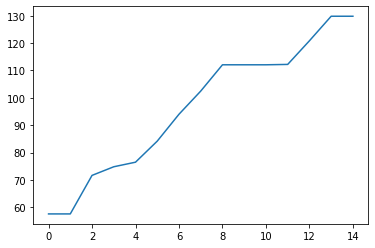

In [23]:
x = np.arange(0,n_gens_2)
y = np.array(best_result_array)
plt.plot(x, y)
plt.show();

#### Next notebook

Genetic Algorithm with PyGAD comapre them.